#Review of distance measures

## Distance concept

- Resemblance can be measured either as a distance (dissimilarity) or a similarity
- Most distance measures can be be readily converted into similarities and vice-versa
- All the below distances can be applied to binary or quantitative data

There are many distance measures. It is important to know the domain of acceptable data valuess for each distance measure. Many measures are not compatible with negative numbers. Other distance measures assume that the data are proportions ranging between zero and one.


Name  | Domain of x | Range of d = f(x) | Comments 
---|---|:---|:---:|---:
Sørensen|x ≥ 0| <center> 1 ≥ d ≥ 0|Portion coefficient in cityblock space; <br>semimetric (l1)
Relative Sørensen|x ≥ 0|<center> 1 ≥ d ≥ 0|Same as Sørensen but data points relativized <br> by sample unit total; semimetric
Jaccard|x ≥ 0| <center> 1 ≥ d ≥ 0|Portion coefficient in cityblock space; metric
Euclidean|All| <center> d ≥ 0|Metric (l2)
Relative Euclidean <br> (Chor distance)|all| <center> √2 ≥ d ≥ 0 <br> for quarter hypersphere; <br> 2 ≥ d ≥ 0 <br> for full hypersphere | Euclidean distance between points on unit <br>hypersphere; metric
Correlation distance |  all | <center> 1 ≥ d ≥ 0 | Converted from correlation to distance, <br> proportional to arc distance between points <br>on unit hypersphere; metric
Chi-Square | x ≥ 0 | <center> d ≥ 0 | Euclidean but doubly weighted by variable and <br>sample unit totals; metric
Squared Euclidean | all | <center> d ≥ 0 | metric
Mahanobis | all | <center> d ≥ 0 | distance between groups weights by within <br>group dispersion; metric

Distance measures can be categorized as metric, semimetric or nonmetric. 

A **metric** distance must satisfy those following rules:
- The minimum value is zero when two items are identical.
- When two items differ, the distance is positive (non negative).
- Symmetry: the distance from object A to object B is the same as the one from B to A.
- Triangle inequality theorem: with three objects, the distance between two of these objects cannot be larger than the sum of the two other distances.

**Semimetrics** can violate the triangle inequality axiom. Example include the Sorensen and Relative Sorensen distance.

**Nonmetric** violateone or more of the other rules.

### Euclidean distance (L2)

<center>$ED = (\sum^N_{i=1}(a_{x,i}-a_{y,i})^2)^{1/2}$ 
</center>
  The formula is simply the pythagorean theorem applied to p dimensions.
  
 ### Manhattan distance (L1)
 
 <center>
 $MD = \sum^N_{i=1}|a_{x,i}-a_{y,i}|$
 </center>
 Also called city block distance, you can only move along one dimension of the space at the time.
 
 In regression analysis, the previous two are widely used and mostly know as L1, or Lasso, and L2, or Ridge, penality.

They are special cases of a more general distance: the Minkowski metric.
In two dimension:

<center>
$Distance = (\sum^N_{i=1}(a_{x,i}-a_{y,i})^k)^{\frac{1}{k}}$
</center>
 
 Hence, when k = 1, it gives the Manhattan distance, K=2 the Eulidean distance. Between the two it is called an Elastic Net. As k increases, it increases the emphasis given on large differences in individual dimensions.
 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

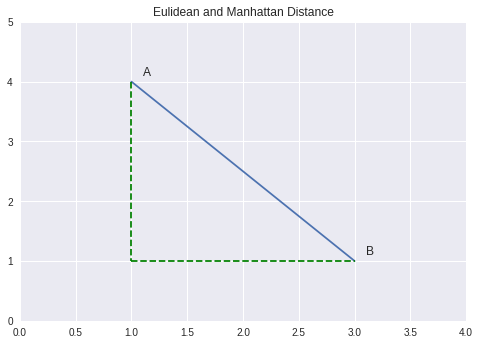

In [29]:
A = [1,3]
B = [4,1]
C = [1,1]

plt.plot(A,B)
plt.plot(C,B, linestyle = '--', color='g')
plt.plot(A,C, linestyle = '--', color='g')
plt.title('Eulidean and Manhattan Distance')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = 0, ymax = 5)
plt.annotate('A', xy=(1.1,4.1))
plt.annotate('B', xy=(3.1,1.1))
plt.show()

### Correlation

The geometric interpretation of correlation is as follow: The correlation coefficient (r) is cosine $\alpha$ where the origin of the coordinate system is the mean of the sample unit. 

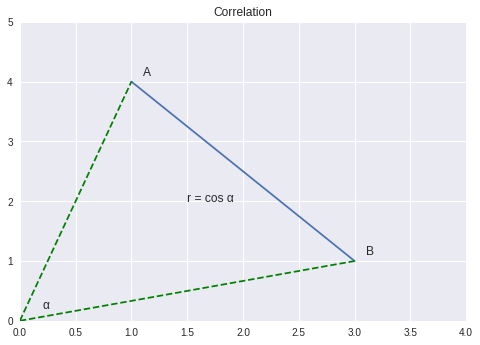

In [42]:
C = [0,0]

plt.plot(A,B)
plt.plot((0,1),(0,4), linestyle = '--', color='g')
plt.plot((0,3),(0,1), linestyle = '--', color='g')
plt.title('Correlation')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = 0, ymax = 5)
plt.annotate('A', xy=(1.1,4.1))
plt.annotate('B', xy=(3.1,1.1))
plt.annotate('α', xy=(0.2,0.2))
plt.annotate('r = cos α', xy=(1.5,2))
plt.show()

If two sample units lie at $180^\circ$ from each other relative to the centroid, then r = -1 = cos(180).
Two items lying on the same radius from the centroid have r = 1 = cos(0), and followingly if r = 0 = cos(90).

The correlation coeficient can be rescaled as a distance measure of range (0, 1) with:

<center>
  $r_{distance}=\frac{1 - r}{2}$
  </center>

### Proportion Coefficient

Proportion coefficient are Mahattan distance measures expressed as proportions of the maximum distance possible. The Sørensen, Jaccard and QSK coefficients are all proportion coeficients. It is possible to represent proportion coefficients as the area under curves.

With $w$ the intersection between two areas:
Sørensen coefficient is $2w/(A.B)$ , and the Jaccard coefficient is $w/(A.B-w)$.

Written in set notation:

$Sørensen. similarity = \frac{2(A∩B)}{(A∪B).(A∪B)}$

$Jaccard.similarity = \frac{A∩B}{A∪B}$



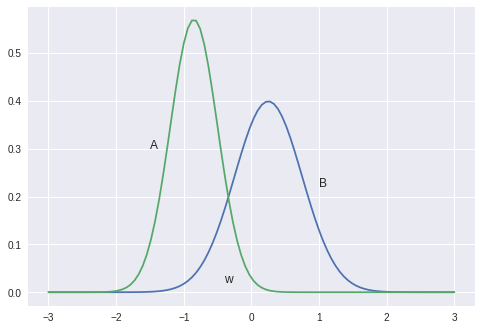

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

mu = 0
variance = 1
sigma = variance**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x*2, 0.5, 1))
plt.plot(x,mlab.normpdf(x*2, -1.7, 0.7))
plt.annotate('A', xy=(-1.5,0.3))
plt.annotate('B', xy=(1,0.22))
plt.annotate('w', xy=(-0.4,0.02))
plt.show()

In Sørensen similarity the shared space between A and B is shown by $w$. So the equation would be: $2\frac{w}{A+B}$. Written as dissimilarity, the equation is re-written as:

$D=\frac{\sum^p_{j=1}|a_{ij}-a_{kj}|}{\sum^p_{j=1}a_{ij}+\sum^p_{j=1}a_{kj}}$

The Jaccard dissimilarity is:

$JD=\frac{2\sum^p_{j=1}a_{ij}-a_{kj}}{\sum^p_{j=1}a_{ij}+\sum^p_{j=1}a_{hj}+\sum^p_{j=1}|a_{ij}-a_{hj}|}$

Quantitative Sumetric Dissimilarity (also known as Kulczynski, or QSK coefficient):

$QSK= 1- \frac{1}{2}[\frac{\sum^p_{j=1}Min(a_{ij},a_{kj}}{\sum^p_{j=1}a_{ij}}+\frac{\sum^p_{j=1}Min(a_{ij},a_{kj})}{\sum^p_{j=1}a_{kj}}]$




Mahalanobis Distance ($D^2$)

Mahalanobis distance is used as a distance measure between two groups (f and h). It is commonly used in discriminant analysis and in testing for outliers. if a is the mean in group f and w is an element from the inverse of the pooled within-groups covariance matrix. 

$D_{fh}=(ng)\sum^p_{i=1}\sum^p_{j=1}w_{ij}.(a_{if}-a_{ih})(a_{if}-a_{jh})$

Where n is the number of sample units, g is the number of groups and i $\neq$ j. Malhanobis distance corrects for the correlation structure of the original variables (the dimensions of the space). The built-in standardization means that it is independent of the measurement units of the original variables.

Reference:

McCune, B., Grace, J. 2002. Analysis of Ecological Communities. Chapter 6: Distance Measures.